### Data Visualization and Exploration

Data visualization and exploration is one of the first steps in machine learning after the data is gathered and statistically summarized. It is used to graphically represent data to qualitatively understand relationships and data quality.

![Visualize](https://apmonitor.com/pds/uploads/Main/data_visualization.png)

Visualization is the graphical representation of data while exploration is gaining an understanding of the data to make better informed decisions about how it can be applied. Visualization and exploration gives an understanding of data diversity, relationships, missing data, bad data, or other factors that may influence decisions to exclude or include an appropriate subset for training.

View course material on [Data Visualization](https://apmonitor.com/pds/index.php/Main/VisualizeData)

In [1]:
import pandas as pd
data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/TCLab_ss1.txt')
data.head()

Q1         Q2     T1     T2
0  46.458549  65.722695  34.01  31.21
1  52.920782  31.783877  40.30  31.11
2  30.273413  14.655389  36.85  29.34
3  97.817672  50.730076  49.23  31.28
4  94.648879  91.025338  50.48  35.14

In [2]:
data.describe()

Q1          Q2          T1          T2
count  120.000000  120.000000  120.000000  120.000000
mean    47.889806   50.990620   39.455833   33.456500
std     26.697499   29.894677    6.911408    3.598129
min      3.103358    0.333330   26.860000   24.510000
25%     24.454193   28.370305   34.185000   31.020000
50%     43.829722   52.226625   37.400000   33.545000
75%     73.543570   79.391947   44.842500   35.845000
max     98.912891   99.991342   53.870000   42.650000

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

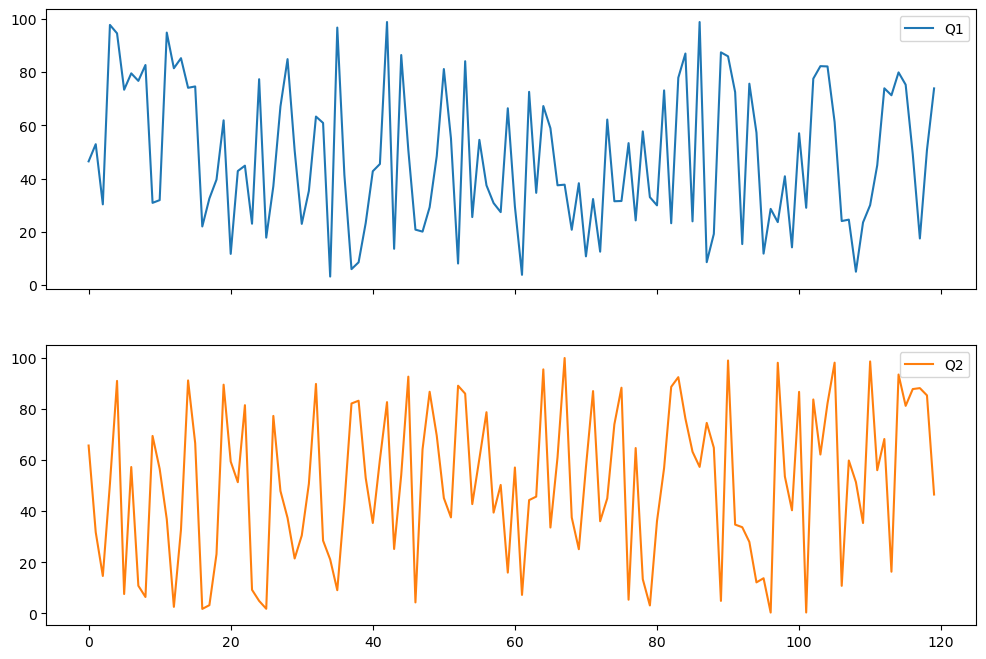

In [3]:
data[['Q1','Q2']].plot(subplots=True,figsize=(12,8))

<AxesSubplot:>

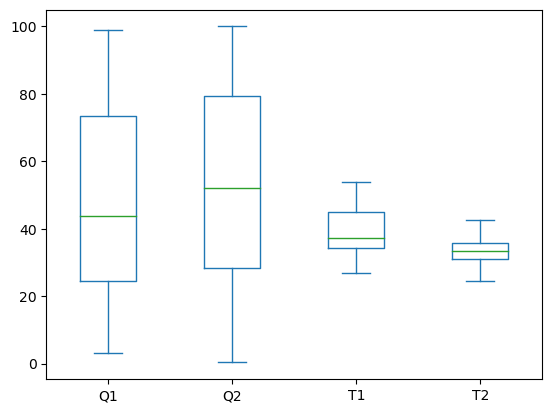

In [4]:
data.plot(kind='box')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

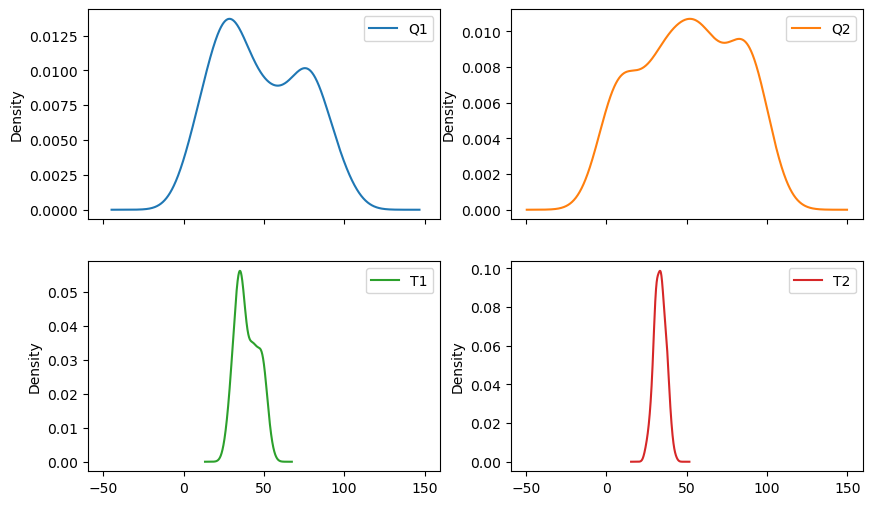

In [5]:
data.plot(kind='density',subplots=True,layout=(2,2),figsize=(10,6))

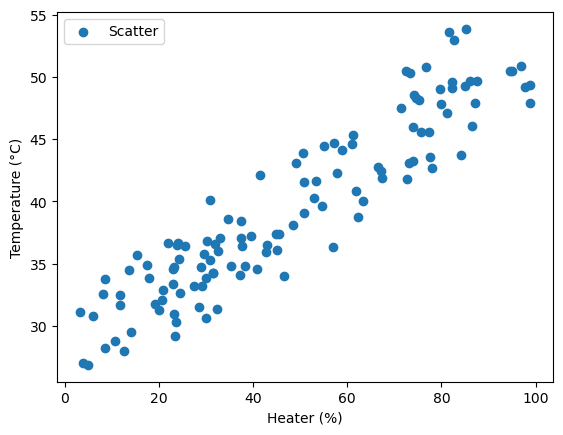

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['Q1'],data['T1'])

# add labels and title
plt.xlabel('Heater (%)')
plt.ylabel('Temperature (°C)')
plt.legend(['Scatter'])
plt.show()

In [7]:
import plotly.express as px
fig = px.scatter(data, x="Q1", y="T1")
fig.show()

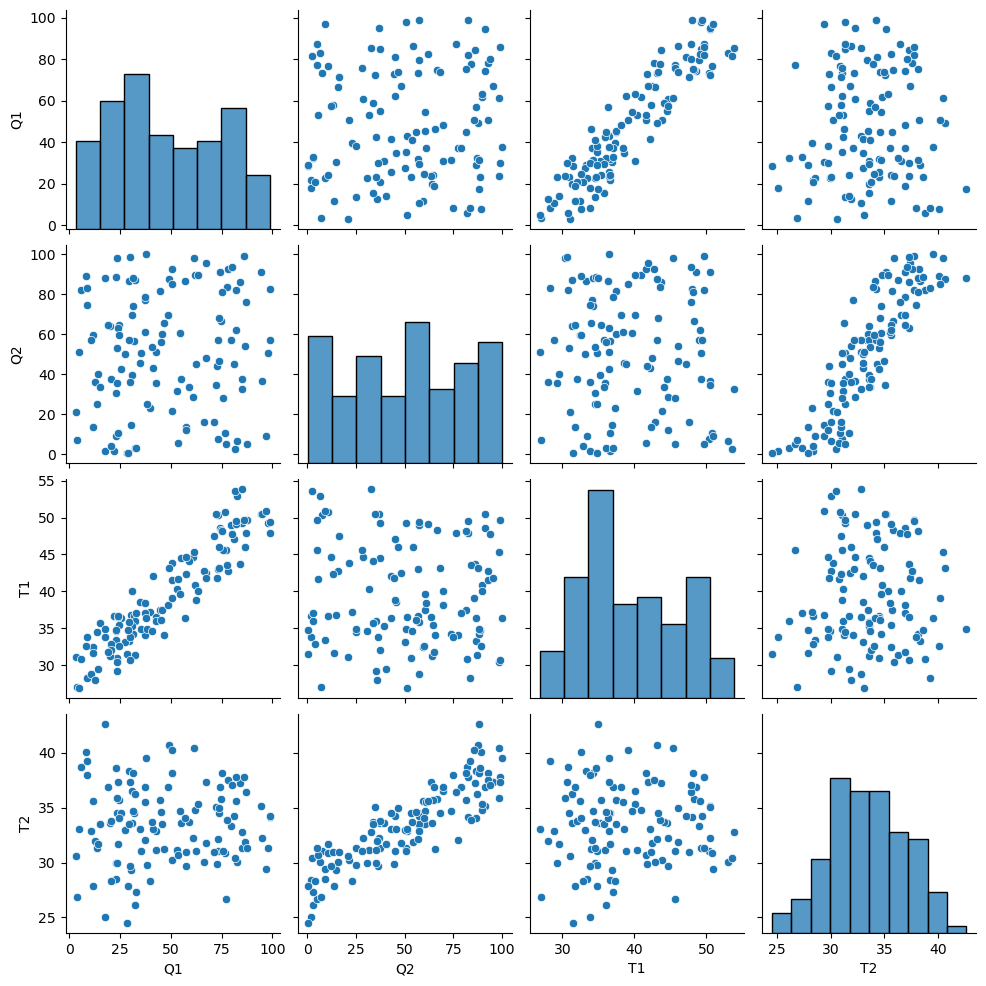

In [8]:
import seaborn as sns
sns.pairplot(data)

<AxesSubplot:>

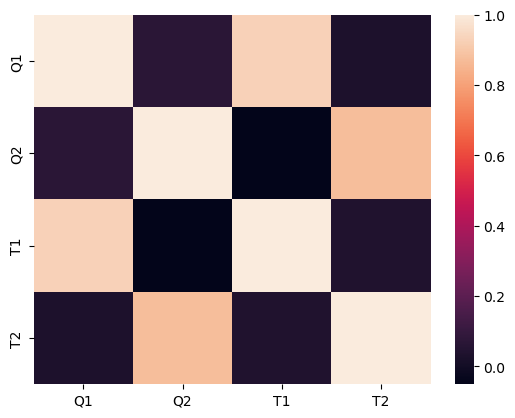

In [9]:
import seaborn as sns
sns.heatmap(data.corr())

In [10]:
import pandas as pd
df = pd.read_csv('http://apmonitor.com/pds/uploads/Main/PV_BYU_South.txt')
df.head()

Month  Day  Hour  Beam Irradiance (W/m^2)  Diffuse Irradiance (W/m^2)  \
0      1    1     0                        0                           0   
1      1    1     1                        0                           0   
2      1    1     2                        0                           0   
3      1    1     3                        0                           0   
4      1    1     4                        0                           0   

   Ambient Temperature (C)  Wind Speed (m/s)  \
0                       -1                 4   
1                       -1                 3   
2                       -3                 2   
3                       -4                 2   
4                       -5                 1   

   Plane of Array Irradiance (W/m^2)  Cell Temperature (C)  \
0                                0.0                  -1.0   
1                                0.0                  -1.0   
2                                0.0                  -3.0   
3                                0.0                  -4.0   
4                                0.0                  -5.0   

   DC Array Output (W)  AC System Output (W)  
0                  0.0                   0.0  
1                  0.0                   0.0  
2                  0.0                   0.0  
3                  0.0                   0.0  
4                  0.0                   0.0

In [11]:
for x in df.columns:
    print(x)

Month
Day
Hour
Beam Irradiance (W/m^2)
Diffuse Irradiance (W/m^2)
Ambient Temperature (C)
Wind Speed (m/s)
Plane of Array Irradiance (W/m^2)
Cell Temperature (C)
DC Array Output (W)
AC System Output (W)


In [12]:
factors=['Ambient Temperature (C)',
         'Wind Speed (m/s)', 
         'Plane of Array Irradiance (W/m^2)',
         'Cell Temperature (C)', 
         'DC Array Output (W)']

In [13]:
data = df[factors].copy()
data.head()

Ambient Temperature (C)  Wind Speed (m/s)  \
0                       -1                 4   
1                       -1                 3   
2                       -3                 2   
3                       -4                 2   
4                       -5                 1   

   Plane of Array Irradiance (W/m^2)  Cell Temperature (C)  \
0                                0.0                  -1.0   
1                                0.0                  -1.0   
2                                0.0                  -3.0   
3                                0.0                  -4.0   
4                                0.0                  -5.0   

   DC Array Output (W)  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [14]:
data = data[data['Plane of Array Irradiance (W/m^2)']>0.01]

In [15]:
data.head()

Ambient Temperature (C)  Wind Speed (m/s)  \
8                        -5                 1   
9                        -3                 1   
10                       -1                 1   
11                        0                 1   
12                        0                 0   

    Plane of Array Irradiance (W/m^2)  Cell Temperature (C)  \
8                              22.761                -7.147   
9                              74.198                -3.160   
10                            130.149                 1.139   
11                            730.169                21.830   
12                            767.896                31.952   

    DC Array Output (W)  
8                90.046  
9               288.755  
10              497.105  
11             2517.678  
12             2530.228

In [16]:
data['efficiency'] = data['DC Array Output (W)'] \
                      /data['Plane of Array Irradiance (W/m^2)']
data.head()

Ambient Temperature (C)  Wind Speed (m/s)  \
8                        -5                 1   
9                        -3                 1   
10                       -1                 1   
11                        0                 1   
12                        0                 0   

    Plane of Array Irradiance (W/m^2)  Cell Temperature (C)  \
8                              22.761                -7.147   
9                              74.198                -3.160   
10                            130.149                 1.139   
11                            730.169                21.830   
12                            767.896                31.952   

    DC Array Output (W)  efficiency  
8                90.046    3.956153  
9               288.755    3.891682  
10              497.105    3.819507  
11             2517.678    3.448076  
12             2530.228    3.295014

In [17]:
data.describe()

Ambient Temperature (C)  Wind Speed (m/s)  \
count              4341.000000       4341.000000   
mean                 11.988712          1.766413   
std                  10.982144          1.278963   
min                 -18.000000          0.000000   
25%                   2.000000          1.000000   
50%                  11.000000          2.000000   
75%                  22.000000          2.000000   
max                  35.000000         10.000000   

       Plane of Array Irradiance (W/m^2)  Cell Temperature (C)  \
count                        4341.000000           4341.000000   
mean                          452.508051             24.155407   
std                           335.214857             17.233292   
min                             0.944000            -16.699000   
25%                           134.283000             10.222000   
50%                           410.327000             22.767000   
75%                           746.021000             37.513000   
max                          1120.264000             66.337000   

       DC Array Output (W)   efficiency  
count          4341.000000  4341.000000  
mean           1459.248431     3.324090  
std            1047.719251     0.323737  
min               3.261000     2.282626  
25%             448.933000     3.083224  
50%            1386.741000     3.321349  
75%            2422.654000     3.567360  
max            3709.329000     4.047491

In [18]:
fig = px.scatter(data, x="Ambient Temperature (C)", \
                       y="Cell Temperature (C)")
fig.show()

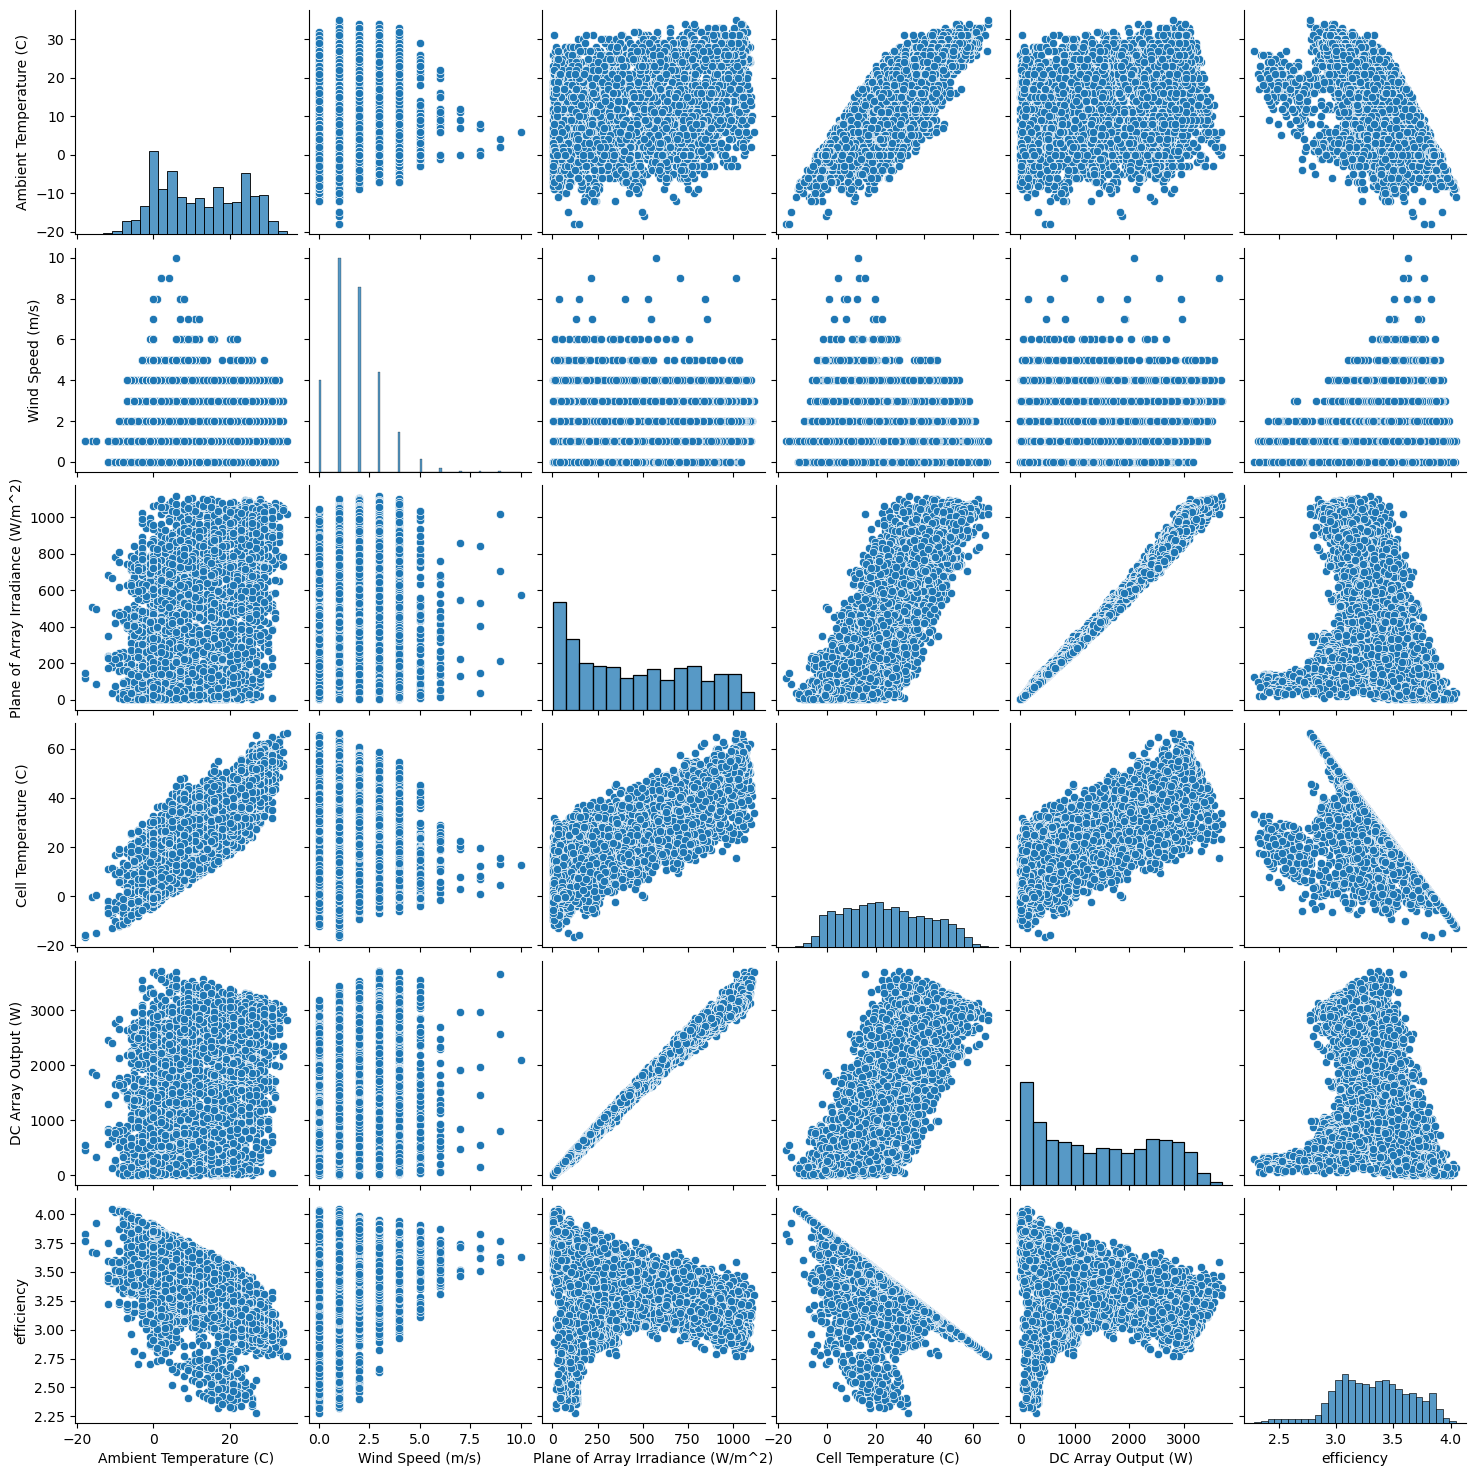

In [19]:
sns.pairplot(data)